# Создание модели

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('vacancies.csv', index_col=0)
df

,vacancy_id,raw_json,prepared_description
0,77594629,"{'id': '77594629', 'premium': False, 'billing_...","[['обязанность', 'работа', 'архивом', 'закрыты..."
1,43551857,"{'id': '43551857', 'premium': False, 'billing_...","[['обязанность', 'работа', 'производственный',..."
2,8388609,"{'id': '8388609', 'premium': False, 'billing_t...","[['менеджер', 'counter', 'manager', 'бренд', '..."
3,10485773,"{'id': '10485773', 'premium': False, 'billing_...","[['обязанность', 'кредитование', 'юридический'..."
4,10485774,"{'id': '10485774', 'premium': False, 'billing_...","[['задача', 'организация', 'деятельность', 'уп..."
...,...,...,...
10066,71344604,"{'id': '71344604', 'premium': False, 'billing_...","[['обязанность', 'участие', 'трансформация', '..."
10067,73441763,"{'id': '73441763', 'premium': False, 'billing_...","[['фирменный', 'магазин', 'redmond', 'пойменны..."
10068,54567399,"{'id': '54567399', 'premium': False, 'billing_...","[['обязанность', 'руководить', 'работа', 'соде..."
10069,29401585,"{'id': '29401585', 'premium': False, 'billing_...","[['обслуживание', 'ремонт', 'электрооборудован..."


In [128]:
X = df['prepared_description'].apply(eval).apply(np.concatenate).apply(' '.join)
X

0        обязанность работа архивом закрытый делопроизв...
1        обязанность работа производственный цех требов...
2        менеджер counter manager бренд bobbi brown про...
3        обязанность кредитование юридический лицо рабо...
4        задача организация деятельность управление фун...
                               ...                        
10066    обязанность участие трансформация отчётность у...
10067    фирменный магазин redmond пойменный улица redm...
10068    обязанность руководить работа содержание здани...
10069    обслуживание ремонт электрооборудование многок...
10070    продавец кассир ильинский хованское работа ряд...
Name: prepared_description, Length: 10071, dtype: object

In [4]:
X.shape

(10071,)

In [4]:
y = df['raw_json'].apply(eval).apply(lambda x: x['professional_roles'][0]['name'])
y

0                Делопроизводитель, архивариус
1              Оператор производственной линии
2                                Администратор
3                         Кредитный специалист
4                                      Аудитор
                         ...                  
10066                      Финансовый менеджер
10067    Продавец-консультант, продавец-кассир
10068                Менеджер/руководитель АХО
10069                         Электромонтажник
10070    Продавец-консультант, продавец-кассир
Name: raw_json, Length: 10071, dtype: object

In [6]:
y.shape

(10071,)

In [5]:
labels = y.unique()

In [6]:
# вспомогательная функция для вычисления средней з/п
#
# (from + to) / 2 если профессия содержит salary
# NaN в противном случае

def count_salary(vac):
    if vac['salary'] is None:
        return np.nan
    if vac['salary']['to'] is None:
        return vac['salary']['from']
    if vac['salary']['from'] is None:
        return vac['salary']['to']
    
    return (vac['salary']['from'] + vac['salary']['to']) // 2

In [7]:
z = df['raw_json'].apply(eval).apply(count_salary)

In [8]:
z = z.fillna(np.round(z.mean()))

In [9]:
z

0        28500.0
1        43000.0
2        66584.0
3        66584.0
4        66584.0
          ...   
10066    66584.0
10067    42500.0
10068    36000.0
10069    32000.0
10070    34500.0
Name: raw_json, Length: 10071, dtype: float64

In [12]:
z.shape

(10071,)

In [10]:
yz = pd.DataFrame({'profession': y, 'salary': z})

In [11]:
X_train, X_test, yz_train, yz_test = train_test_split(X, yz, test_size=0.2, random_state=42)

In [12]:
y_train = yz_train['profession']
z_train = yz_train['salary']
y_test = yz_test['profession']
z_test = yz_test['salary']

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer(max_df=0.5, max_features=1000, stop_words='english')

bow = count_vectorizer.fit_transform(X_train)
bow.shape

(8056, 1000)

In [14]:
count_vectorizer.vocabulary_

{'основный': 495,
 'задача': 213,
 'обеспечение': 442,
 'выполнение': 120,
 'план': 553,
 'продажа': 663,
 'территория': 883,
 'поддержание': 568,
 'необходимый': 431,
 'ассортимент': 51,
 'товарный': 894,
 'запас': 225,
 'препарат': 637,
 'компания': 313,
 'дистрибьютор': 165,
 'сеть': 789,
 'продвижение': 664,
 'льготный': 364,
 'сегмент': 781,
 'рынок': 759,
 'основной': 494,
 'должностной': 178,
 'ключевой': 300,
 'клиент': 295,
 'заявка': 236,
 'лекарственный': 352,
 'анализ': 43,
 'срок': 844,
 'годность': 132,
 'склад': 795,
 'филиал': 948,
 'планирование': 554,
 'зона': 242,
 'ответственность': 499,
 'координация': 336,
 'контроль': 334,
 'реализация': 724,
 'проведение': 654,
 'акция': 41,
 'региональный': 729,
 'льгота': 363,
 'уровень': 924,
 'главный': 130,
 'специалист': 832,
 'проводить': 657,
 'требования': 900,
 'должный': 180,
 'знать': 241,
 'фармацевтический': 944,
 'россия': 749,
 'норма': 437,
 'действовать': 151,
 'законодательство': 219,
 'государственный': 136,


In [15]:
bow.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 2],
        [0, 0, 0, ..., 0, 0, 0]])

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, max_features=1000, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(X_train)
tfidf_vectorizer.vocabulary_

{'основный': 495,
 'задача': 213,
 'обеспечение': 442,
 'выполнение': 120,
 'план': 553,
 'продажа': 663,
 'территория': 883,
 'поддержание': 568,
 'необходимый': 431,
 'ассортимент': 51,
 'товарный': 894,
 'запас': 225,
 'препарат': 637,
 'компания': 313,
 'дистрибьютор': 165,
 'сеть': 789,
 'продвижение': 664,
 'льготный': 364,
 'сегмент': 781,
 'рынок': 759,
 'основной': 494,
 'должностной': 178,
 'ключевой': 300,
 'клиент': 295,
 'заявка': 236,
 'лекарственный': 352,
 'анализ': 43,
 'срок': 844,
 'годность': 132,
 'склад': 795,
 'филиал': 948,
 'планирование': 554,
 'зона': 242,
 'ответственность': 499,
 'координация': 336,
 'контроль': 334,
 'реализация': 724,
 'проведение': 654,
 'акция': 41,
 'региональный': 729,
 'льгота': 363,
 'уровень': 924,
 'главный': 130,
 'специалист': 832,
 'проводить': 657,
 'требования': 900,
 'должный': 180,
 'знать': 241,
 'фармацевтический': 944,
 'россия': 749,
 'норма': 437,
 'действовать': 151,
 'законодательство': 219,
 'государственный': 136,


In [17]:
tfidf.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.25411362],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [18]:
tfidf.shape

(8056, 1000)

In [19]:
import pickle

with open("data.pickle", 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test, z_train, z_test), f)

with open("bow.pickle", 'wb') as f:
    pickle.dump(count_vectorizer, f)

with open("tfidf.pickle", 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)

# Использование готовой модели

In [1]:
import pandas as pd
import numpy as np
import pickle

In [20]:
with open("data.pickle", 'rb') as f:
    X_train, X_test, y_train, y_test, z_train, z_test = pickle.load(f)
with open("bow.pickle", 'rb') as f:
    bow = pickle.load(f)
with open("tfidf.pickle", 'rb') as f:
    tfidf = pickle.load(f)

In [21]:
bow.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.5,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': 'english',
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [22]:
bow.transform(X_train).todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 2],
        [0, 0, 0, ..., 0, 0, 0]])

In [23]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.5,
 'max_features': 1000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': None,
 'sublinear_tf': True,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [24]:
tfidf.transform(X_train).todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.25411362],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

# Классификатор

bow

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
docs_train = bow.transform(X_train).toarray()
docs_test = bow.transform(X_test).toarray()

In [27]:
mnb = MultinomialNB()

In [28]:
mnb.fit(docs_train, y_train) # 23sec

MultinomialNB()

In [29]:
y_pred = mnb.predict(docs_test)
y_pred

array(['Оператор call-центра, специалист контактного центра',
       'Учитель, преподаватель, педагог', 'Кредитный специалист', ...,
       'Уборщица, уборщик', 'Водитель', 'Полицейский'], dtype='<U62')

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  2 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0 13 10]
 [ 0  0  0 ...  0  7  1]]
                                                                precision    recall  f1-score   support

                                                Event-менеджер       0.00      0.00      0.00         1
                                                   PR-менеджер       0.00      0.00      0.00         1
                                SMM-менеджер, контент-менеджер       0.67      0.50      0.57         4
                                                    Автомойщик       0.67      0.33      0.44         6
                                      Автослесарь, автомеханик       0.67      0.20      0.31        10
                                         Агент по недвижимости       0.52      0.72      0.60        18
                                                       Агроном       0.00      0.00      0.00         1
           

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [33]:
print(mnb.score(docs_test, y_test))

0.509181141439206


tfidf

In [34]:
tf_train = tfidf.transform(X_train).toarray()
tf_test = tfidf.transform(X_test).toarray()

In [35]:
tfmnb = MultinomialNB()
tfmnb.fit(tf_train, y_train)

MultinomialNB()

In [36]:
y_pred = tfmnb.predict(tf_test)
y_pred

array(['Другое', 'Учитель, преподаватель, педагог',
       'Менеджер по продажам, менеджер по работе с клиентами', ...,
       'Повар, пекарь, кондитер', 'Другое', 'Полицейский'], dtype='<U62')

In [37]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 5 0]
 [0 0 0 ... 0 5 0]]
                                                                precision    recall  f1-score   support

                                                Event-менеджер       0.00      0.00      0.00         1
                                                   PR-менеджер       0.00      0.00      0.00         1
                                SMM-менеджер, контент-менеджер       0.00      0.00      0.00         4
                                                    Автомойщик       0.00      0.00      0.00         6
                                      Автослесарь, автомеханик       0.00      0.00      0.00        10
                                         Агент по недвижимости       0.00      0.00      0.00        18
                                                       Агроном       0.00      0.00      0.00         1
                                               

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
print(tfmnb.score(tf_test, y_test))

0.3543424317617866


# Регрессор

bow

In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [40]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [41]:
def print_metrics(y_test, y_pred):
    print("R2:", r2_score(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))
    print("MAE:", mean_absolute_error(y_test, y_pred))

In [42]:
lgr = DecisionTreeRegressor()
lgr.fit(docs_train, z_train) #4sec

DecisionTreeRegressor()

In [43]:
lgr_pred = lgr.predict(docs_test)
lgr_pred

array([66584., 37500., 42600., ..., 20000., 20000., 54000.])

In [44]:
print_metrics(z_test, lgr_pred)

R2: -7.524838743128091
MSE: 205152487491.93597
RMSE: 452937.6198682728
MAE: 55531.187671486834


tfidf

In [45]:
tf_train = tfidf.transform(X_train).toarray()
tf_test = tfidf.transform(X_test).toarray()

In [46]:
tflgr = DecisionTreeRegressor()
tflgr.fit(tf_train, z_train) #8sec

DecisionTreeRegressor()

In [47]:
print_metrics(z_test, tflgr.predict(tf_test))

R2: -0.39822002343294005
MSE: 33648532777.177788
RMSE: 183435.36403097902
MAE: 42527.92745643307


# Кластеризация

In [48]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [49]:
X = np.concatenate((X_train, X_test))

In [129]:
docs = bow.transform(X).toarray()
tf_docs = tfidf.transform(X).toarray()

In [130]:
'''
метка по размеру з/п
0 - <10000
1 - 10000-25000
2 - 25000-50000
3 - 50000-100000
4 - >100000
'''
metki = z.apply(lambda f: 0 if f < 10000 else 1 if f < 25000 else 2 if f < 50000 else 3 if f < 100000 else 4)

In [131]:
k = metki.unique().shape[0]
k

5

In [132]:
clf = KMeans(n_clusters=k)
clf.fit(docs)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [133]:
clf.labels_

array([0, 0, 3, ..., 0, 0, 0], dtype=int32)

In [136]:
def print_cluster_metrics(X, clf_labels):
    print("Homogeneity:", metrics.homogeneity_score(metki, clf_labels))
    print("Completeness:", metrics.completeness_score(metki, clf_labels))
    print("V-measure:", metrics.v_measure_score(metki, clf_labels))
    print("Adjusted Rand score:", metrics.adjusted_rand_score(metki, clf_labels))
    print("Silhouette score:", metrics.silhouette_score(X, clf_labels))

In [137]:
print_cluster_metrics(docs, clf.labels_)

Homogeneity: 0.027518073005026747
Completeness: 0.03831857371986949
V-measure: 0.032032412388133515
Adjusted Rand score: -0.025878760670291785
Silhouette score: 0.1650923717348888


In [138]:
tfclf = KMeans(n_clusters=k)
tfclf.fit(tf_docs)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [139]:
tfclf.labels_

array([1, 4, 2, ..., 4, 4, 0], dtype=int32)

In [140]:
print_cluster_metrics(tf_docs, tfclf.labels_)

Homogeneity: 0.022201549617639735
Completeness: 0.020045678558764875
V-measure: 0.021068607165581402
Adjusted Rand score: 0.02231479417337324
Silhouette score: 0.012034591694662622


# Тематическое моделирование

In [156]:
from sklearn.decomposition import NMF, TruncatedSVD, LatentDirichletAllocation
import matplotlib.pyplot as plt

n_samples = 2000
n_features = 1000
n_components = 10
n_top_words = 20
batch_size = 128
init = "nndsvda"


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()


## NMF

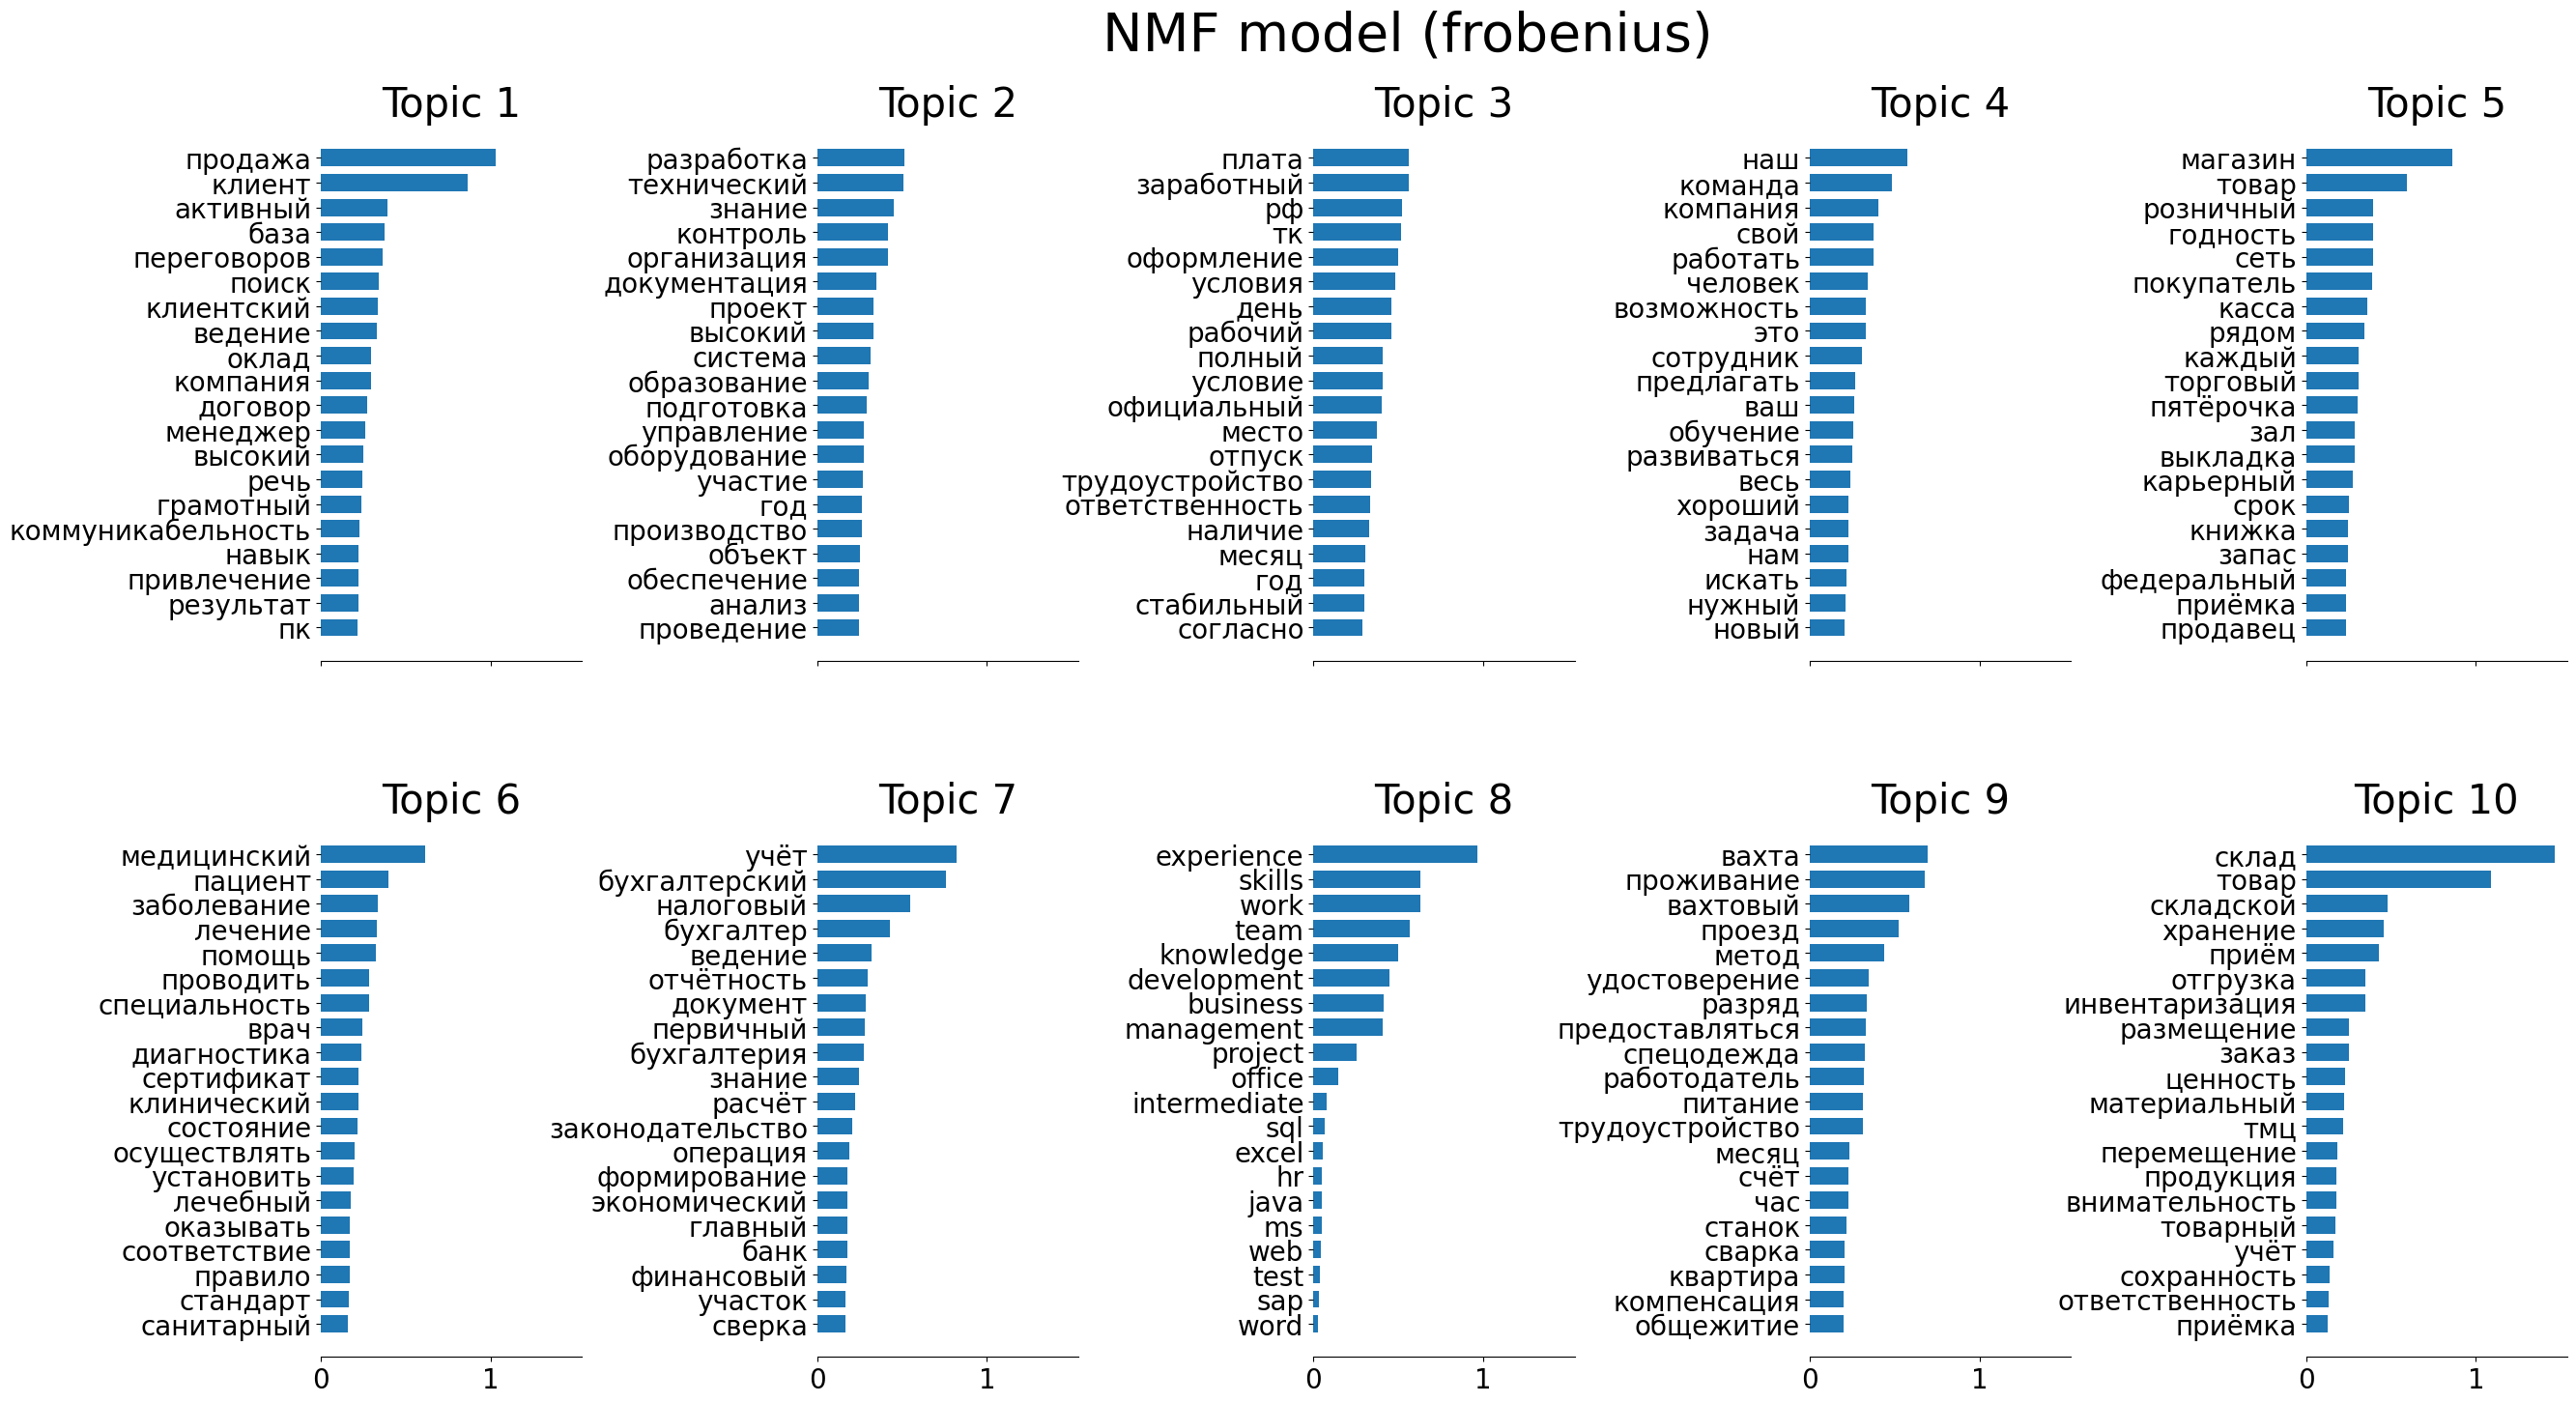

In [157]:
nmf = NMF(
    n_components=n_components,
    random_state=42,
    init=init,
    beta_loss="frobenius",
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=1,
).fit(tf_docs)

tfidf_feature_names = tfidf.get_feature_names_out()
plot_top_words(nmf, tfidf_feature_names, n_top_words, "NMF model (frobenius)")

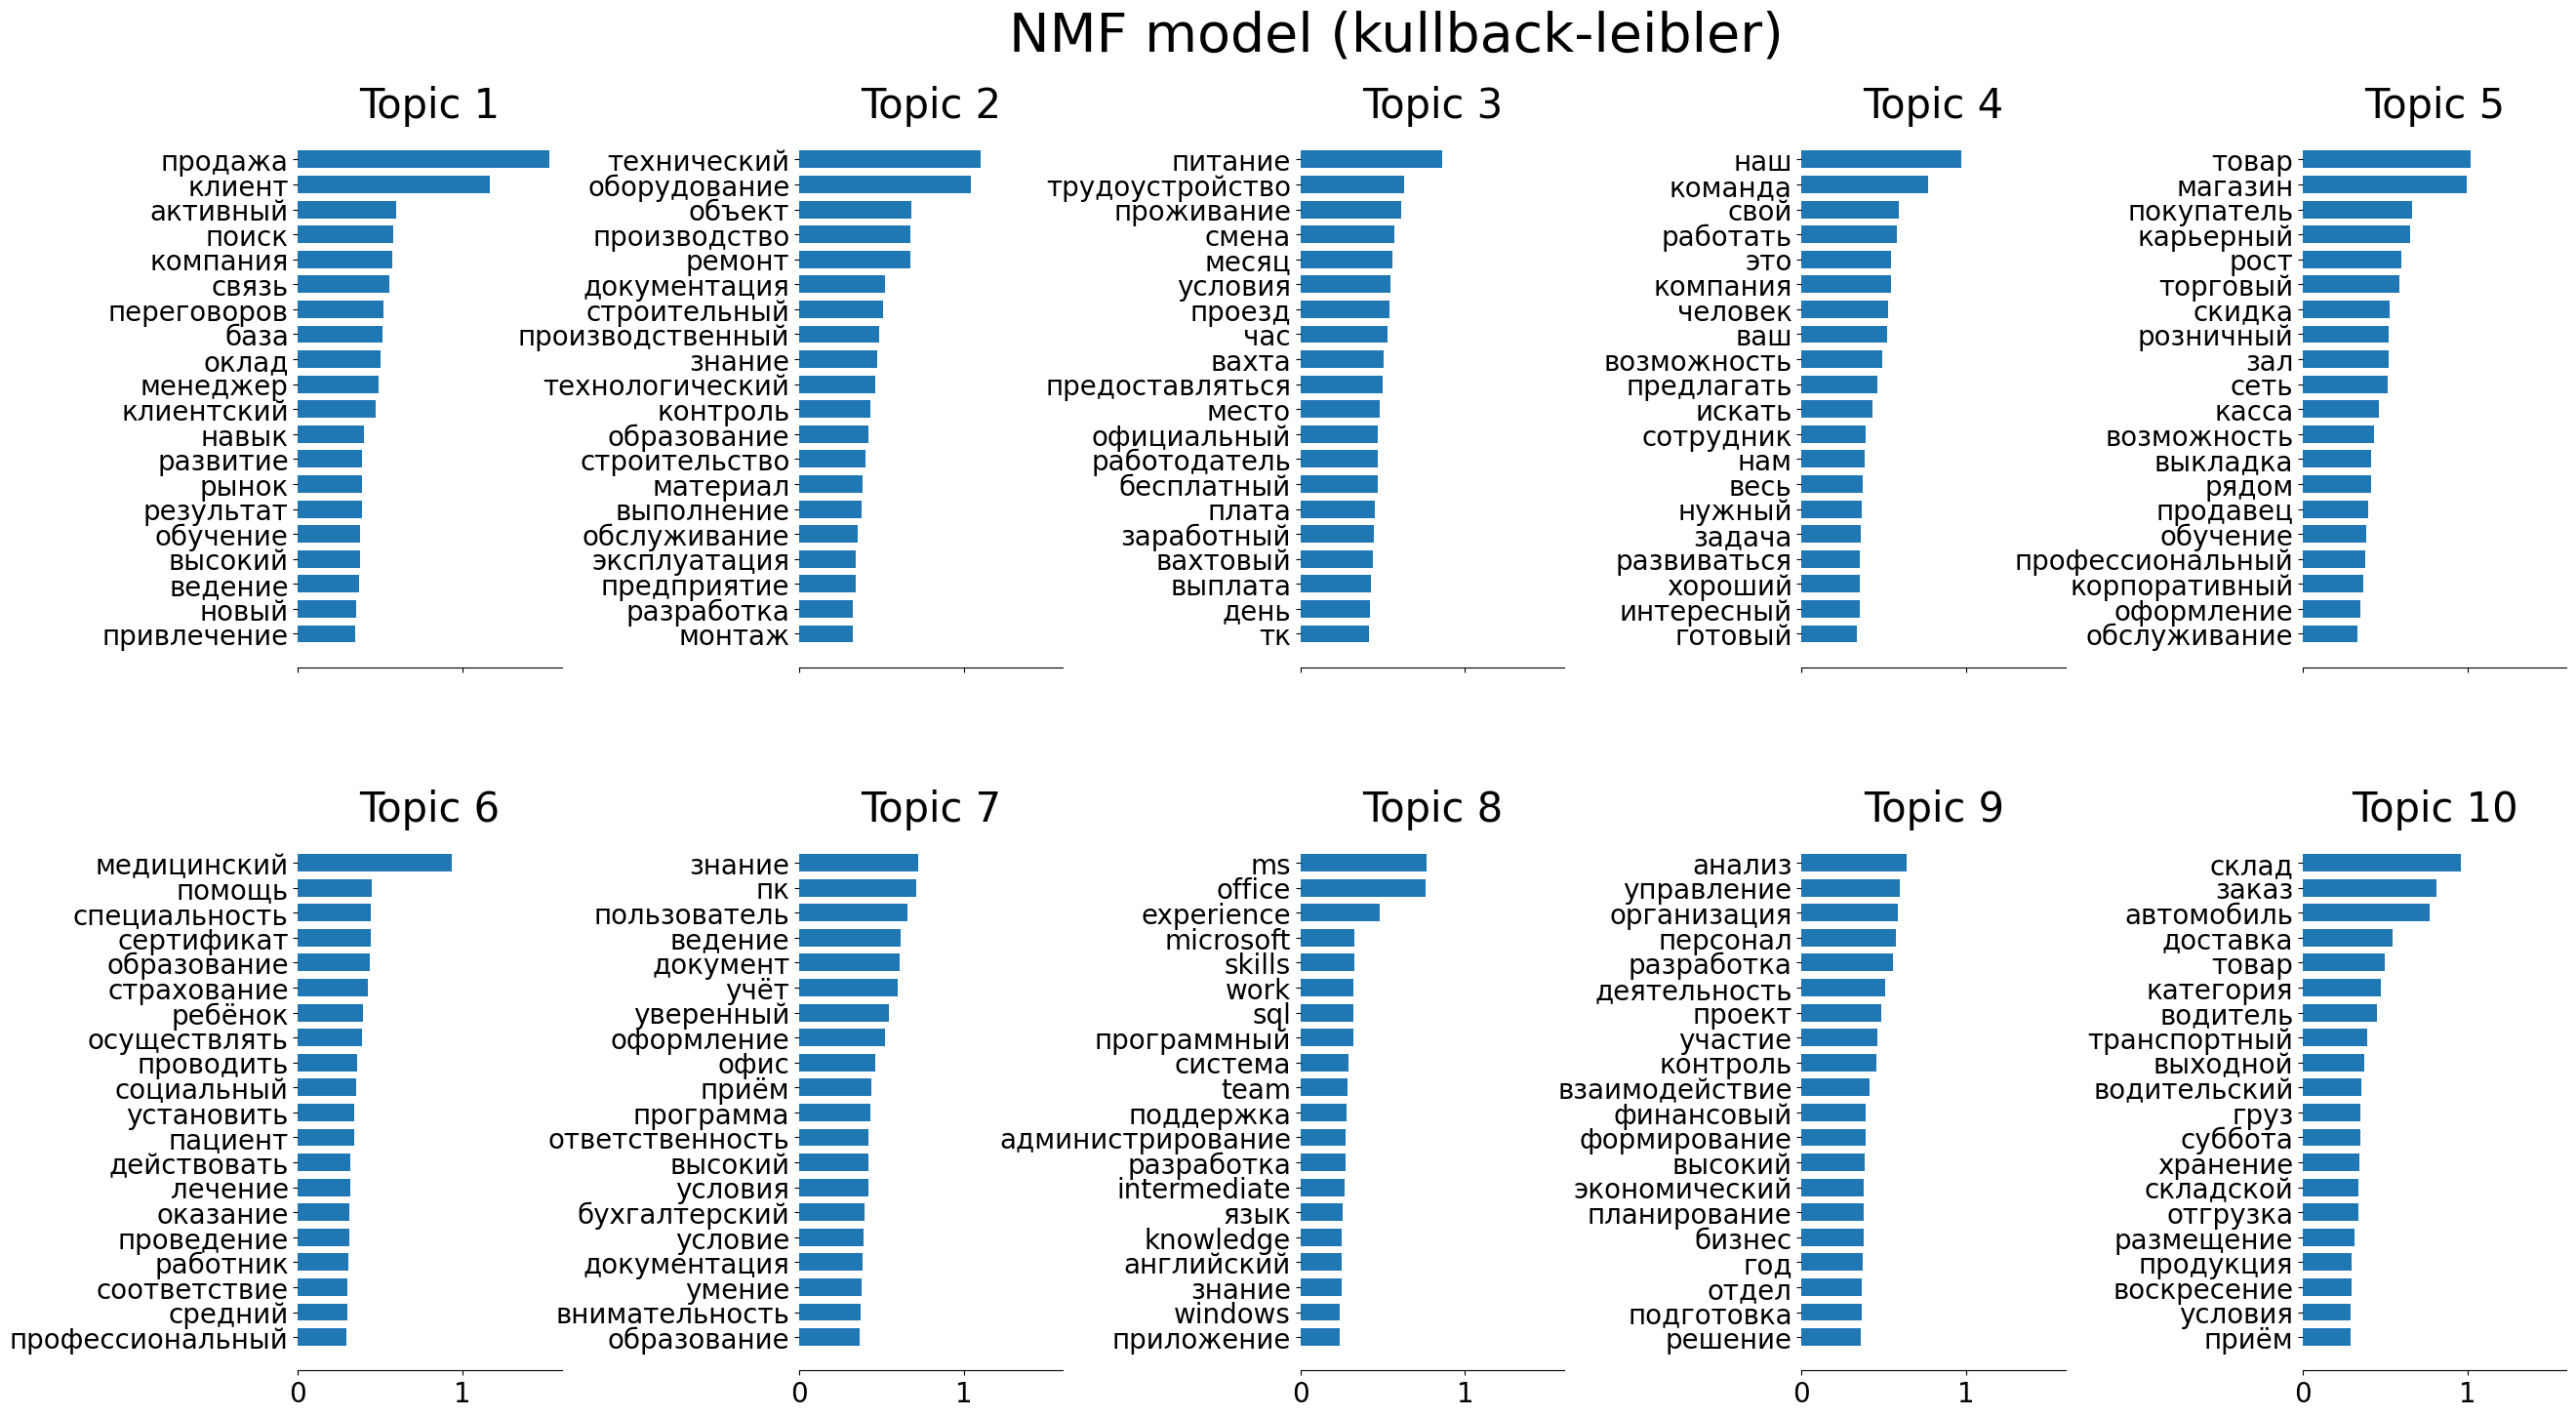

In [158]:
nmf = NMF(
    n_components=n_components,
    random_state=1,
    init=init,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha_W=0.00005,
    alpha_H=0.00005,
    l1_ratio=0.5,
).fit(tf_docs)

plot_top_words(nmf, tfidf_feature_names, n_top_words, "NMF model (kullback-leibler)")

## LDA

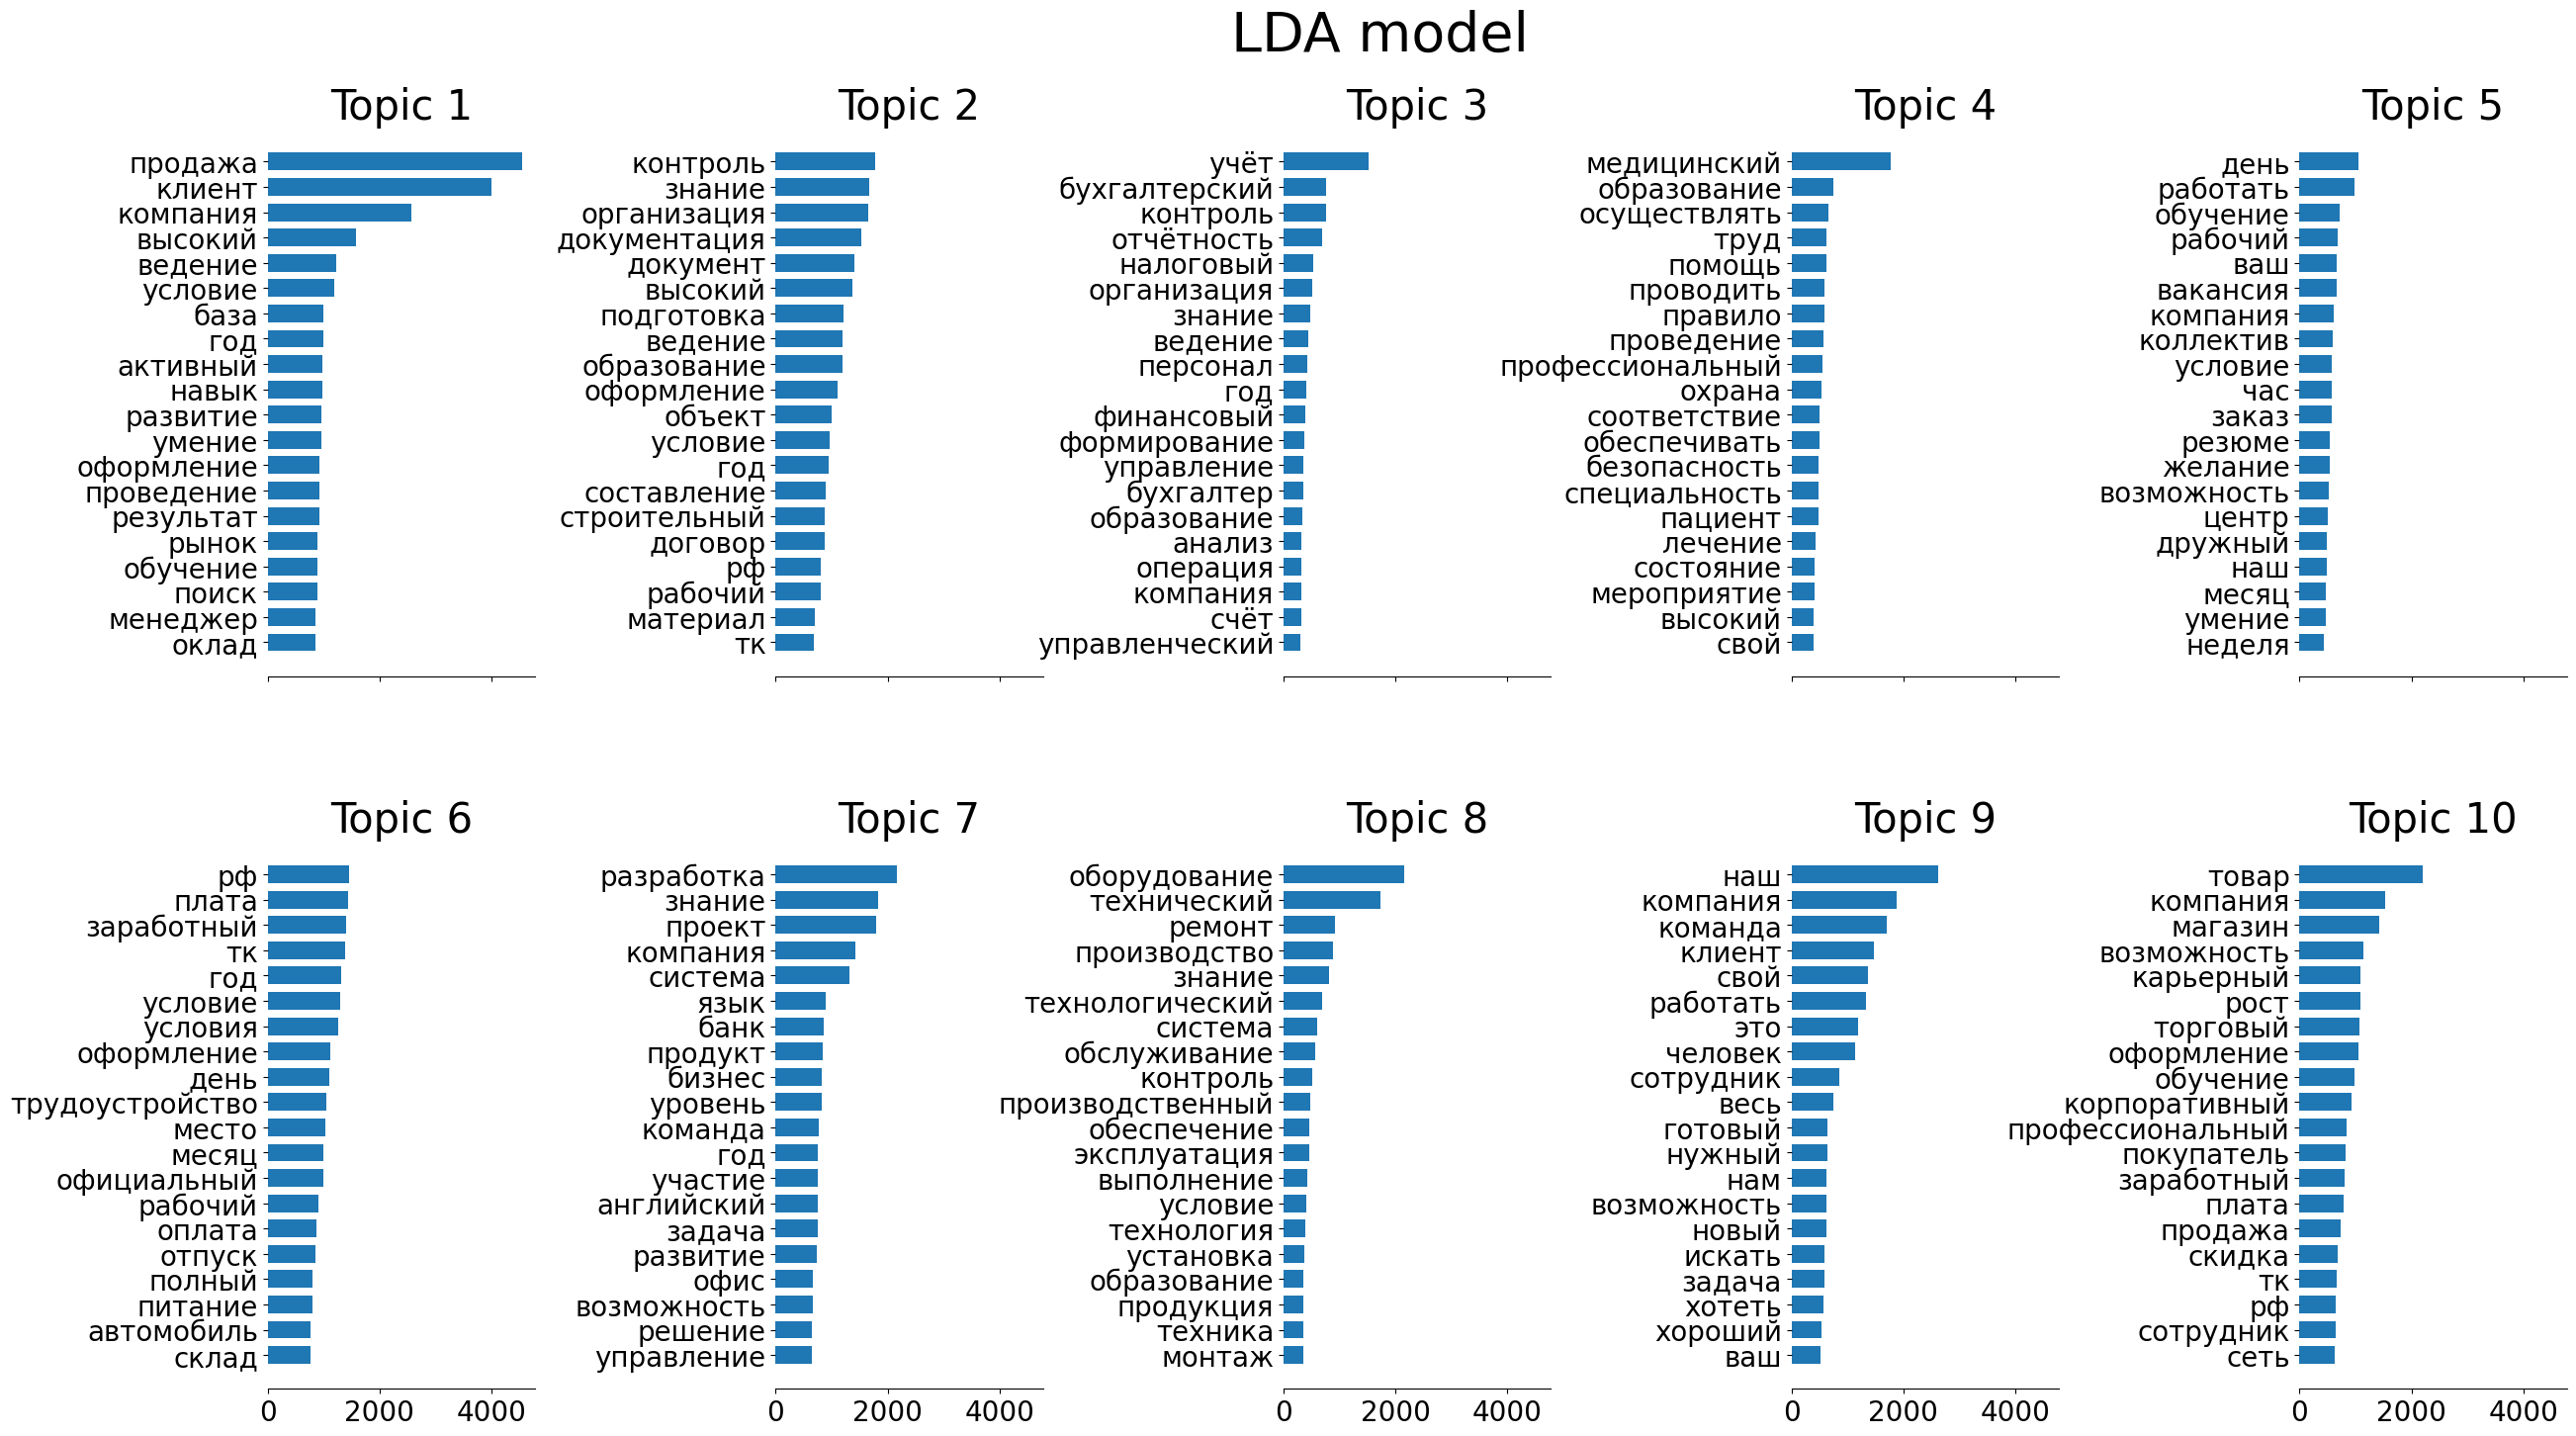

In [159]:
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
lda.fit(docs)

bow_feature_names = bow.get_feature_names_out()
plot_top_words(lda, bow_feature_names, n_top_words, "LDA model")

## LSA

In [160]:
from scipy import linalg

In [161]:
U, S, Vh = linalg.svd(bow.transform(X).todense())

In [162]:
print(U.shape, S.shape, Vh.shape)

(10071, 10071) (1000,) (1000, 1000)


In [163]:
def show_topics(a):
    top_words = lambda t: [bow_feature_names[i] for i in np.argsort(t)[:-n_top_words-1:-1]]
    topic_words = ([top_words(t) for t in a])
    return [' '.join(t) for t in topic_words]
show_topics(Vh[:n_components])

['test experience development business knowledge work team management skills сварка бесплатно project узел общежитие повар станок уборка авто ночной гражданство',
 'клиент продажа компания наш команда работать это менеджер человек возможность активный свой рост обучение рынок сотрудник ваш продукт развитие развиваться',
 'контроль медицинский организация условие оформление образование труд продажа рф учёт ведение проведение оборудование товар соответствие тк документ высокий выполнение правило',
 'медицинский товар оформление плата заработный магазин день рф выплата тк месяц профессиональный место отпуск оплата помощь карьерный условие бесплатный средний',
 'продажа клиент ведение контроль высокий договор организация переговоров проведение выполнение база менеджер активный документ подготовка клиентский условие услуга план отчётность',
 'медицинский клиент проводить свой помощь пациент заболевание правило труд наш лечение осуществлять проведение безопасность охрана установить состояние

In [176]:
svd = TruncatedSVD(
    n_components=n_components,
    random_state=42
)
svd.fit(tf_docs)

TruncatedSVD(n_components=10, random_state=42)

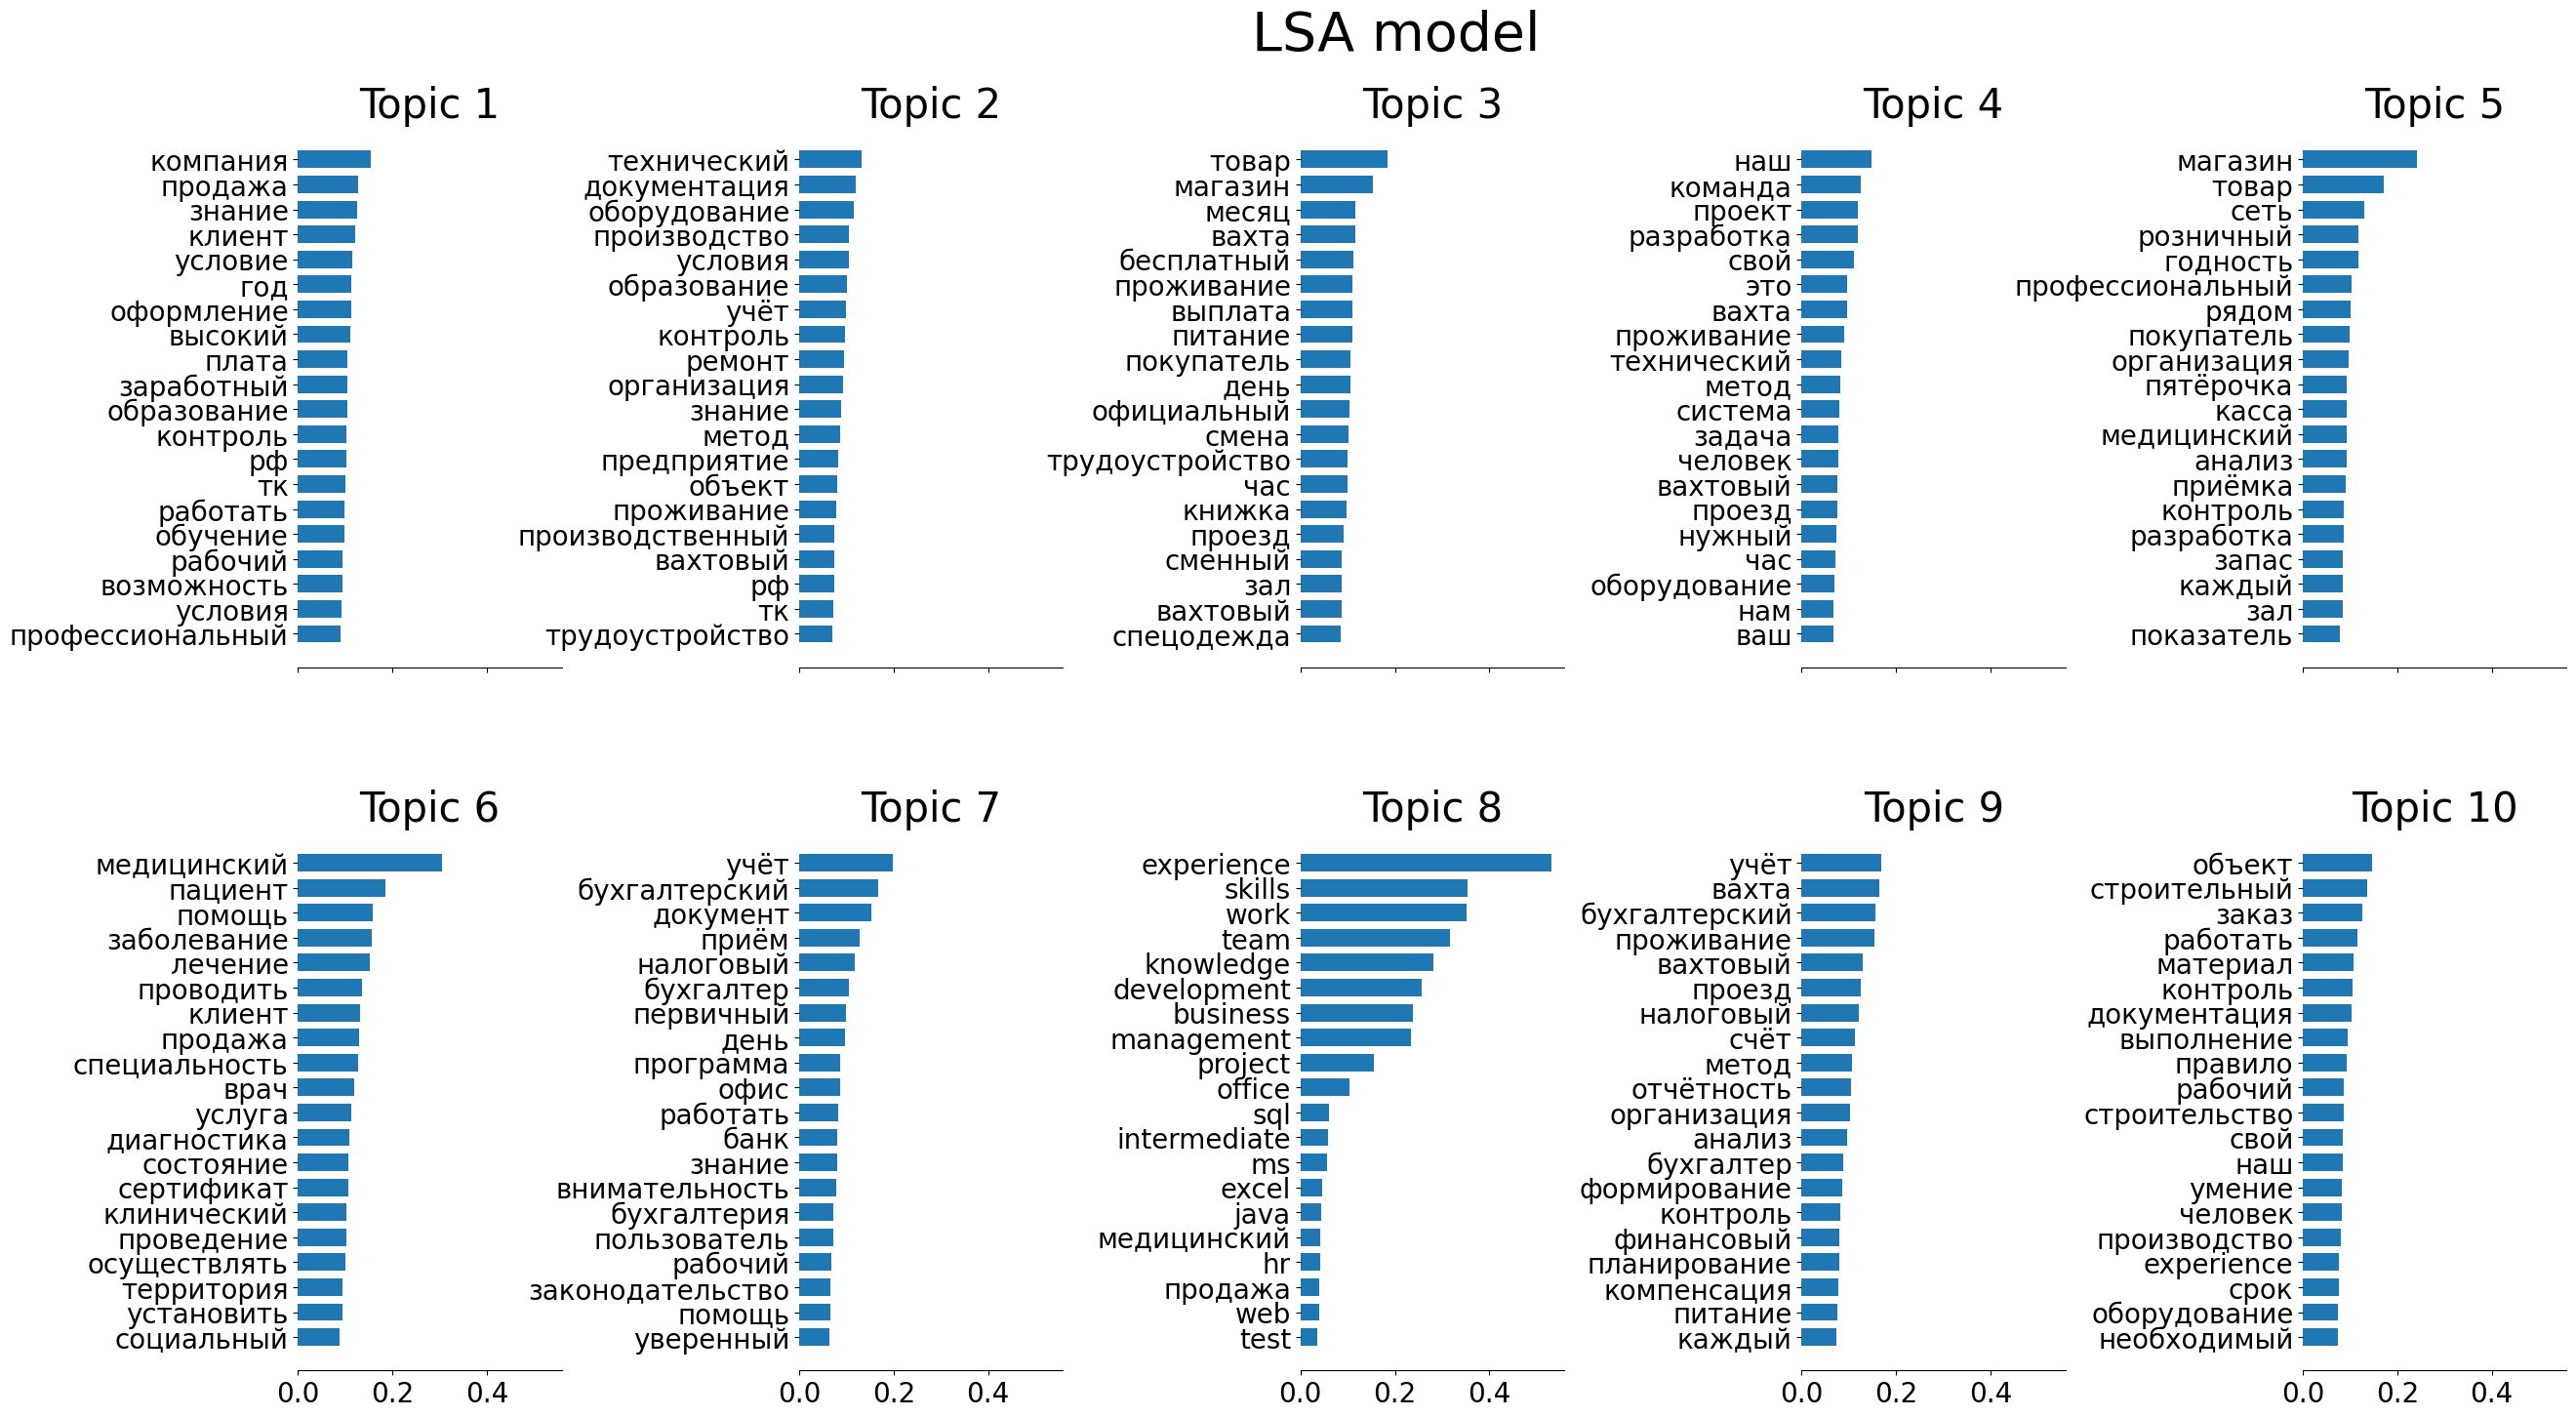

In [178]:
plot_top_words(svd, tfidf_feature_names, n_top_words, "LSA model")